# Задание 5.

Ранее мы выяснили, что размеры выборок в имеющихся данных малы.

Попробуйте протестировать несколько гипотез из предыдущих заданий с использованием материала, полученного на этом занятии. Изменились ли результаты?

In [1]:
# загрузка данных
from google.colab import files
uploaded = files.upload()


Saving data.xlsx to data (1).xlsx


In [1]:
# загрузка пакетов
install.packages('readxl')
library(readxl)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
install.packages("boot")
library("boot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
install.packages("bootstrap")
library("bootstrap")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
install.packages("coin")
library(coin)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: survival


Attaching package: ‘survival’


The following object is masked from ‘package:boot’:

    aml




In [6]:
data <- read_xlsx("/content/data.xlsx")


New names:
• `Choi...25` -> `Choi...92`
• `Tgi...26` -> `Tgi...93`
• `HDLi...27` -> `HDLi...94`
• `LDLi...28` -> `LDLi...95`
• `Choi...29` -> `Choi...96`
• `Tgi...30` -> `Tgi...97`
• `HDLi...31` -> `HDLi...98`
• `LDLi...32` -> `LDLi...99`


In [7]:
data <- data %>%
    mutate(Patient.number = as.factor(Patient.number)) %>%
    mutate(Vial.number = as.factor(Vial.number)) %>%
    mutate(Sucrose = as.factor(Sucrose)) %>%
    mutate(Group = as.factor(Group)) %>%
    mutate(Sm = as.factor(Sm)) %>%
    mutate(Dm = as.factor(Dm)) %>%
    mutate(HT = as.factor(HT)) %>%
    mutate(LVH = as.factor(LVH)) %>%
    mutate(IHD = as.factor(IHD)) %>%
    mutate(MI = as.factor(MI)) %>%
    mutate(Str = as.factor(Str)) %>%
    mutate(A_C = as.factor(A_C)) %>%
    mutate(A_H = as.factor(A_H)) %>%
    mutate(A_D = as.factor(A_D)) %>%
    mutate(Statins = as.factor(Statins)) %>%
    mutate(Plaque = as.factor(Plaque)) %>%
    mutate(risk = as.factor(risk))

In [8]:
data

Vial.number,Patient.number,GPHDL1,GPHDL2,GPHDL3,GPHDL4,GPHDL5,GPHDL6,GPHDL7,GPHDL8,⋯,r.ant.max,r.pos.max,l.lat.max,l.ant.max,l.pos.max,carotid.IMT.mean,Plaque,Statins,comorbidities,risk
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<chr>,<fct>
3,52,0.4300000,1.300000,0.2300000,0.05000000,0.590000,2.620000,1.620000,3.860000,⋯,0.90,0.95,0.85,0.90,0.90,0.8500000,3,1,Type 2 diabetes mellitus; MI - 2016,7
4,53,0.4100000,3.860000,0.3100000,0.10000000,0.960000,3.190000,2.420000,3.750000,⋯,0.97,0.98,0.86,0.74,0.80,0.8241667,2,0,1-2 times per year hypertensive crises (Corinfar),0
6,55,0.4000000,3.690000,0.1700000,0.03000000,0.800000,3.040000,1.620000,3.230000,⋯,0.80,0.90,1.07,1.00,1.30,0.8475000,2,0,"Cholecystitis, gastritis without exacerbation. Diffuse focal changes in the thyroid gland",3
7,56,0.3700000,2.960000,0.2200000,0.05000000,1.000000,3.000000,2.110000,3.060000,⋯,0.86,0.86,0.80,0.74,0.91,0.6725000,1,0,chronic cholecystitis,2
8,57,0.5600000,2.760000,0.4600000,0.08000000,1.110000,2.960000,3.560000,4.170000,⋯,1.00,1.00,0.94,0.69,0.87,0.7850000,1,0,"Cholecystectomy 20 years ago, hr.gastritis",4
9,58,0.4100000,2.140000,0.2200000,0.12000000,0.930000,2.550000,2.060000,2.950000,⋯,1.26,1.03,0.80,0.74,0.75,0.8491667,1,0,Iron-deficiency anemia,4
10,59,0.4200000,1.710000,0.2000000,0.06000000,0.640000,2.840000,1.590000,3.480000,⋯,1.04,0.81,0.63,0.63,0.86,0.7041667,2,0,Type 2 diabetes mellitus,6
11,60,0.3500000,2.000000,0.2100000,0.06000000,0.670000,2.570000,1.710000,3.790000,⋯,0.80,0.70,0.90,0.90,0.85,0.7458333,2,1,"Nodal goiter (L-thyroxine, 100 μg)",5
12,61,0.3000000,1.940000,0.1500000,0.07000000,0.790000,2.330000,1.610000,2.720000,⋯,0.62,0.69,1.12,1.12,1.06,0.7758333,2,0,Cholecystectomy in September 2016,1


# Бутстреп (HDLi...94)



In [9]:
myfn <- function(x,i) {return(sum(x[i])/length(x[i]))}
result <- boot(data$HDLi...94, myfn, R = 999)
result


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = data$HDLi...94, statistic = myfn, R = 999)


Bootstrap Statistics :
    original      bias    std. error
t1* 62.11667 -0.07361806    4.112854

среднее средних = 62.11667

стандартная ошибка = 4.112854

In [10]:
mean(data$HDLi...94)

[1] 62.11667

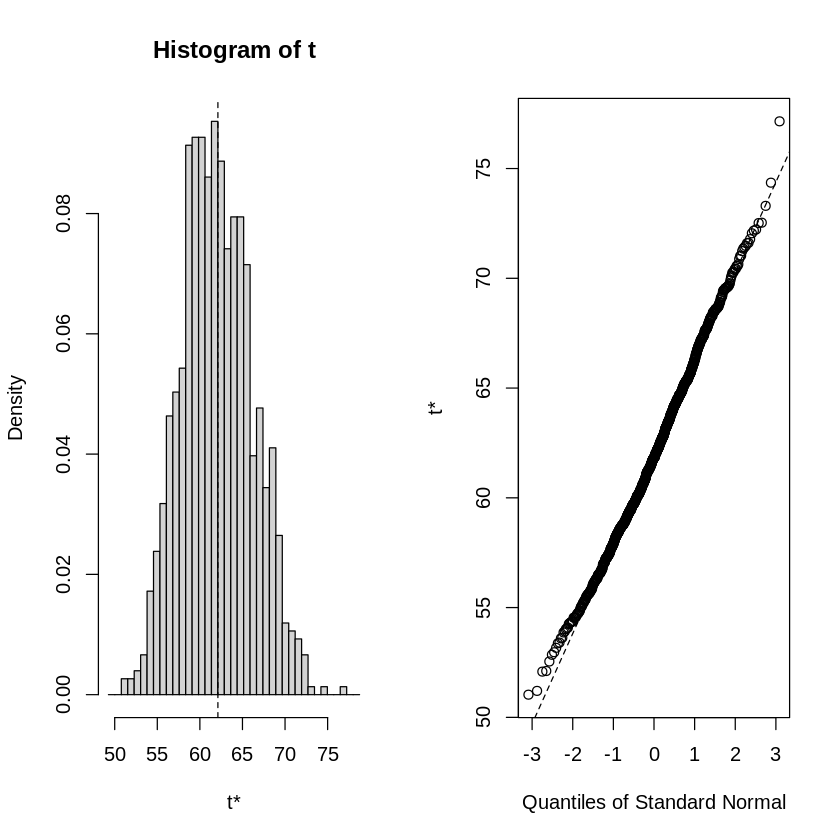

In [11]:
plot(result)

распределение средних - нормальное

In [12]:
# доверительный интервал для среднеарифметического
quantile(result$t, c(0.025, 0.975))

2.5%    97.5% 
54.56028 70.25750

Ноль не принадлежит ДИ - отличия статистически значимы.

Среднее средних совпадает со средним по исходной выборке - выборку можно использовать для остальных тестов без препроцессирования.

# Jackknife (HDLi...94)

In [13]:
theta <- function(x){mean(x)}

In [14]:
results <- jackknife(data$HDLi...94, theta)
results

$jack.se
[1] 4.331872

$jack.bias
[1] 0

$jack.values
 [1] 63.50000 62.71765 62.12941 62.17647 62.41765 61.82353 63.00588 59.41765
 [9] 61.95294 63.15882 62.30588 62.99412 63.24118 59.94706 61.03529 62.05294
[17] 61.74118 62.48235

$call
jackknife(x = data$HDLi...94, theta = theta)


стандартное отклонение 4.331872

Warning message in geom_vline(xintercept = mean(data$HDLi...94), color = "red", :
“Ignoring unknown parameters: `pty`”
Warning message in geom_vline(xintercept = mean(results$jack.values), color = "purple2", :
“Ignoring unknown parameters: `pty`”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


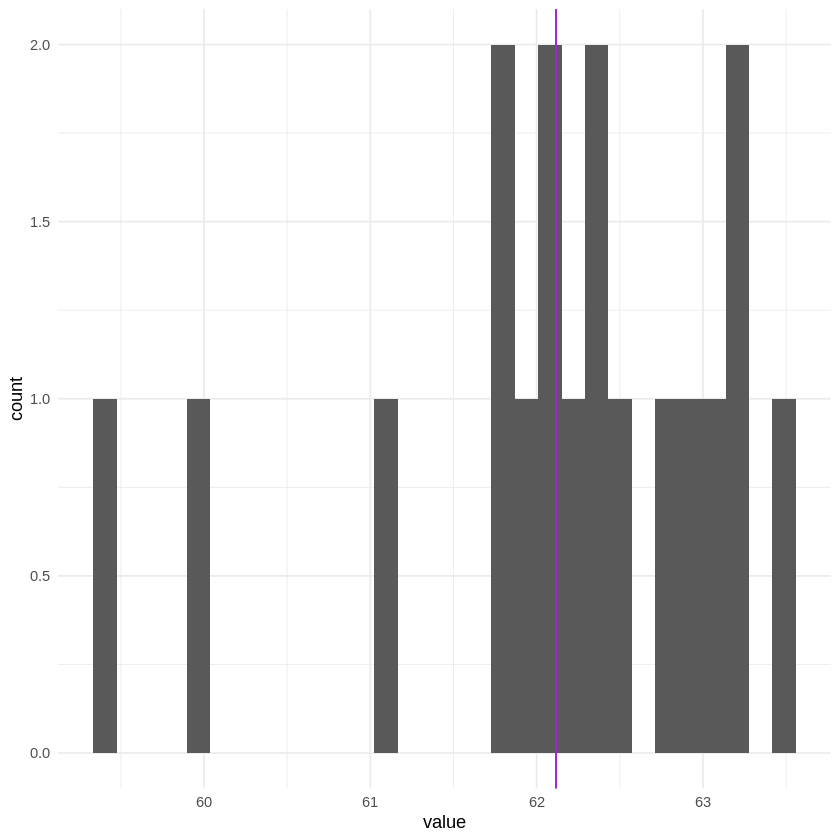

In [15]:
ggplot(as_tibble(results$jack.values), aes(value)) +
  geom_histogram() +
  geom_vline(xintercept = mean(data$HDLi...94), color = "red", pty = 1) +
  geom_vline(xintercept = mean(results$jack.values), color = "purple2", pty = 1) +
  theme_minimal()

среднее по выборке и среднее средних сошлись

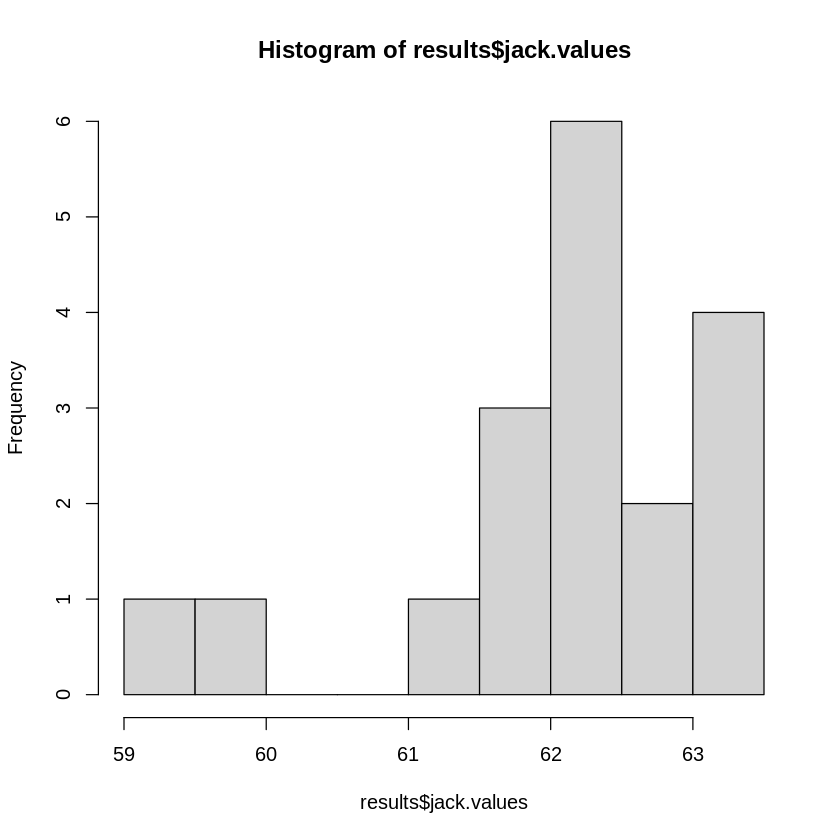

In [16]:
hist(results$jack.values)

# Перестановочный тест (HDLi...94)

Гипотеза: влияет ли уровень ЛПВП-холестерина в крови на попадание в определенную группу?

H0 - уровень ЛПВП-холестерина в крови не влияет на попадание в определенную группу

H1 - уровень ЛПВП-холестерина в крови влияет на попадание в определенную группу

In [17]:
t.test((data$HDLi...94[data$Group == 0]),
       (data$HDLi...94[data$Group == 1]))


	Welch Two Sample t-test

data:  (data$HDLi...94[data$Group == 0]) and (data$HDLi...94[data$Group == 1])
t = 2.3688, df = 2.9113, p-value = 0.1013
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -8.843561 57.043561
sample estimates:
mean of x mean of y 
     82.2      58.1 


t-test разницу не показал

In [18]:
model <- aov(HDLi...94 ~ Group, data = data)
summary(model)

            Df Sum Sq Mean Sq F value Pr(>F)  
Group        1   1452  1452.0   5.415 0.0334 *
Residuals   16   4290   268.1                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

ANOVA тест показывает, что значимые связи есть => уровень ЛПВП-холестерина в крови влияет на попадание в определенную группу

Проверим гипотезу перестановочным тестом

In [19]:
coin::normal_test(HDLi...94 ~ Group, data, conf.int = TRUE)


	Asymptotic Two-Sample van der Waerden (Normal Quantile) Test

data:  HDLi...94 by Group (0, 1)
Z = 2.0682, p-value = 0.03862
alternative hypothesis: true mu is not equal to 0
95 percent confidence interval:
  2.2 42.0
sample estimates:
difference in location 
                  24.1 


пермутация показала разницу

Отвергаем нулевую гипотезу.

# Разница средних (HDLi...94)

In [20]:
ac_diffs <- data %>%
  mutate(ln_ac = log(HDLi...94)) %>%
  group_by(Group) %>%
  summarize(mean_ac = mean(HDLi...94), meanln_ac = mean(ln_ac)) %>%
  summarize(diff_ac = diff(mean_ac), diffln_ac = diff(meanln_ac))


In [21]:
ac_diffs

diff_ac,diffln_ac
<dbl>,<dbl>
-24.1,-0.3651765


In [22]:
reps <- 1000
permdiffs <- c()

In [23]:
for (i in 1:reps){
  onediff <- data %>%
    mutate(perm_c2 = sample(Group)) %>%
    group_by(perm_c2) %>%
    summarize(mean_AC = mean(HDLi...94)) %>%
    summarize(diff(mean_AC)) %>% pull()
  permdiffs <- c(permdiffs, onediff)
}

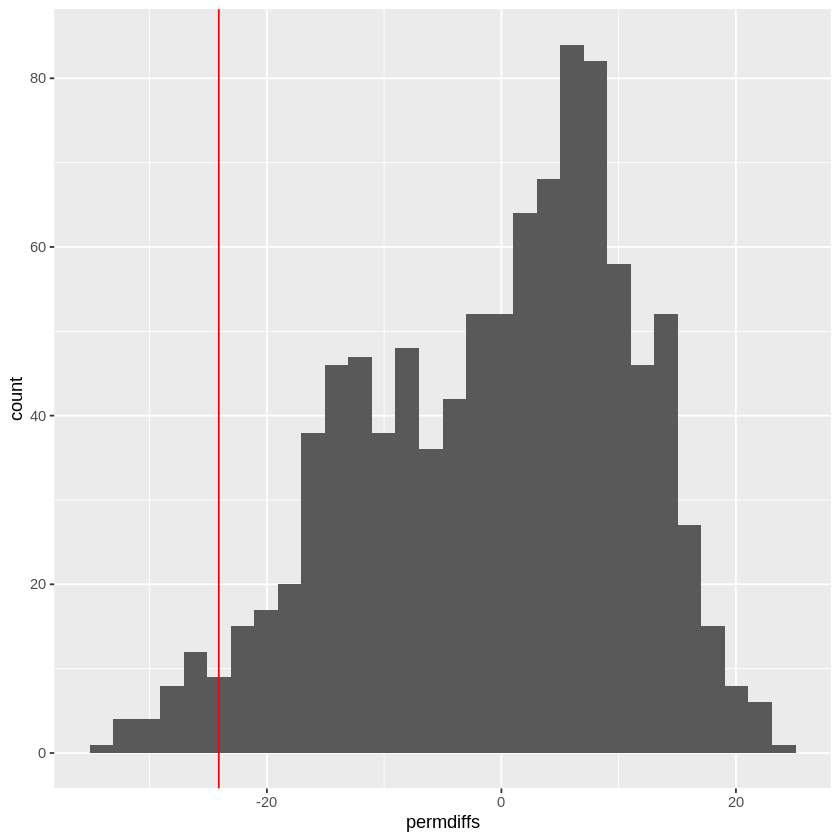

In [24]:
permdiffs %>% data.frame() %>%
  ggplot(aes(x = permdiffs)) +
  geom_histogram(bins=30) +
  geom_vline(xintercept = ac_diffs$diff_ac, color = 'red')

In [25]:
(sum(ac_diffs$diff_ac >= permdiffs) + 1) /1000

[1] 0.034

Сколько раз перестановочные различия меньше или равны наблюдаемой разнице в средних значениях. В данном случае разница составляет 3%.

Доверительный интервал от 2,5% до 97,5%.

Нет значимых различий.

# Отношение дисперсий (HDLi...94)

In [26]:
ac_varratio <- data %>%
  group_by(Group) %>%
  summarize(var_AC = var(HDLi...94)) %>%
  summarize(AC_ratio = var_AC[1] / var_AC[2])

In [27]:
permvars <- c()

In [28]:
for (i in 1:reps){
  oneratio <- data %>%
    mutate(perm_c2 = sample(Group)) %>%
    group_by(perm_c2) %>%
    summarize(var_AC = var(HDLi...94)) %>%
    summarize(var_AC[1] / var_AC[2]) %>% pull()
  permvars <- c(permvars, oneratio)
}

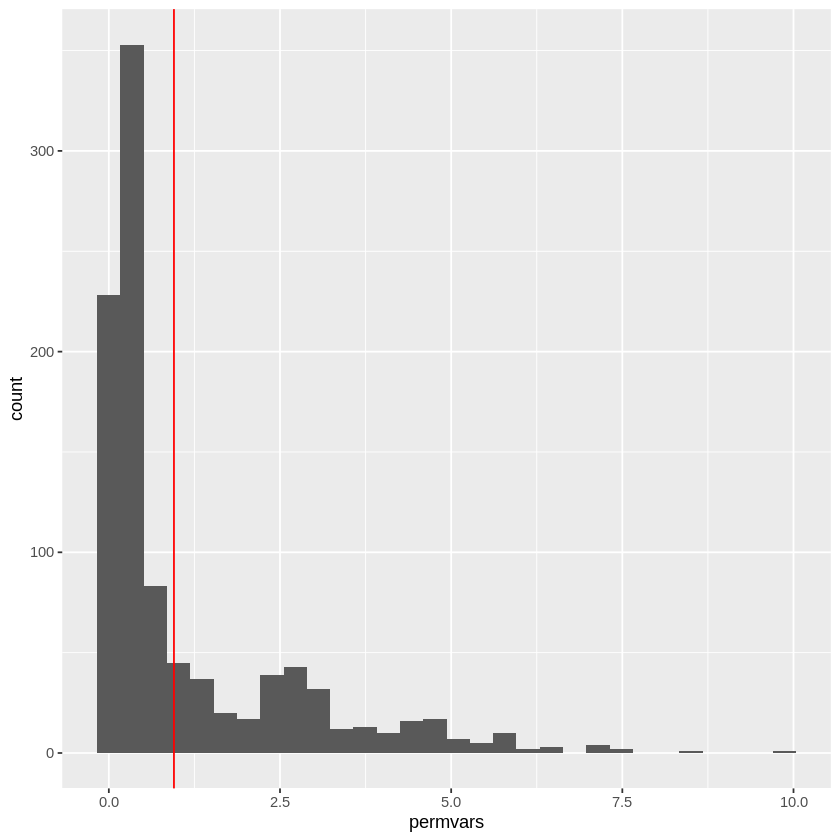

In [29]:
permvars %>% data.frame() %>%
  ggplot(aes(x = permvars)) +
  geom_histogram(bins=30) +
  geom_vline(xintercept = ac_varratio$AC_ratio, color = 'red')

In [30]:
(sum(ac_varratio$AC_ratio <= permvars)+1)/1000

[1] 0.315

31% расчитанных отношений дисперсий будут больше, чем отношения дисперсий по выборкам без пермутации.

# Перестановочный тест (GPHDL4)

Гипотеза: влияет ли величина GPHDL4 (количество субфракции липопротеинов) на попадание в определенную группу?

H0 - величина GPHDL4 не влияет на попадание в определенную группу

H1 - величина GPHDL4 влияет на попадание в определенную группу

In [31]:
t.test(GPHDL4 ~ Group, data, conf.int = TRUE)


	Welch Two Sample t-test

data:  GPHDL4 by Group
t = 2.1493, df = 2.1365, p-value = 0.1564
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -0.05030042  0.16407820
sample estimates:
mean in group 0 mean in group 1 
     0.12333333      0.06644444 


t-test разницу не показал

In [32]:
model <- aov(GPHDL4 ~ Group, data = data)
summary(model)

            Df   Sum Sq  Mean Sq F value Pr(>F)   
Group        1 0.008091 0.008091   14.62 0.0015 **
Residuals   16 0.008855 0.000553                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

ANOVA тест показывает, что значимые связи есть => величина GPHDL4 влияет на попадание в определенную группу

Проверим гипотезу перестановочным тестом

In [33]:
coin::normal_test(GPHDL4 ~ Group, data, conf.int = TRUE)


	Asymptotic Two-Sample van der Waerden (Normal Quantile) Test

data:  GPHDL4 by Group (0, 1)
Z = 2.3221, p-value = 0.02023
alternative hypothesis: true mu is not equal to 0
95 percent confidence interval:
 0.02 0.11
sample estimates:
difference in location 
                  0.06 


перестановочный тест показал разницу между величинами в группах

Отвергаем нулевую гипотезу.

# Разница средних (GPHDL4)

In [34]:
ac_diffs <- data %>%
  mutate(ln_ac = log(GPHDL4)) %>%
  group_by(Group) %>%
  summarize(mean_ac = mean(GPHDL4), meanln_ac = mean(ln_ac)) %>%
  summarize(diff_ac = diff(mean_ac), diffln_ac = diff(meanln_ac))

In [35]:
ac_diffs

diff_ac,diffln_ac
<dbl>,<dbl>
-0.05688889,-0.6122564


In [36]:
reps <- 1000
permdiffs <- c()

In [37]:
for (i in 1:reps){
  onediff <- data %>%
    mutate(perm_c2 = sample(Group)) %>%
    group_by(perm_c2) %>%
    summarize(mean_AC = mean(GPHDL4)) %>%
    summarize(diff(mean_AC)) %>% pull()
  permdiffs <- c(permdiffs, onediff)
}

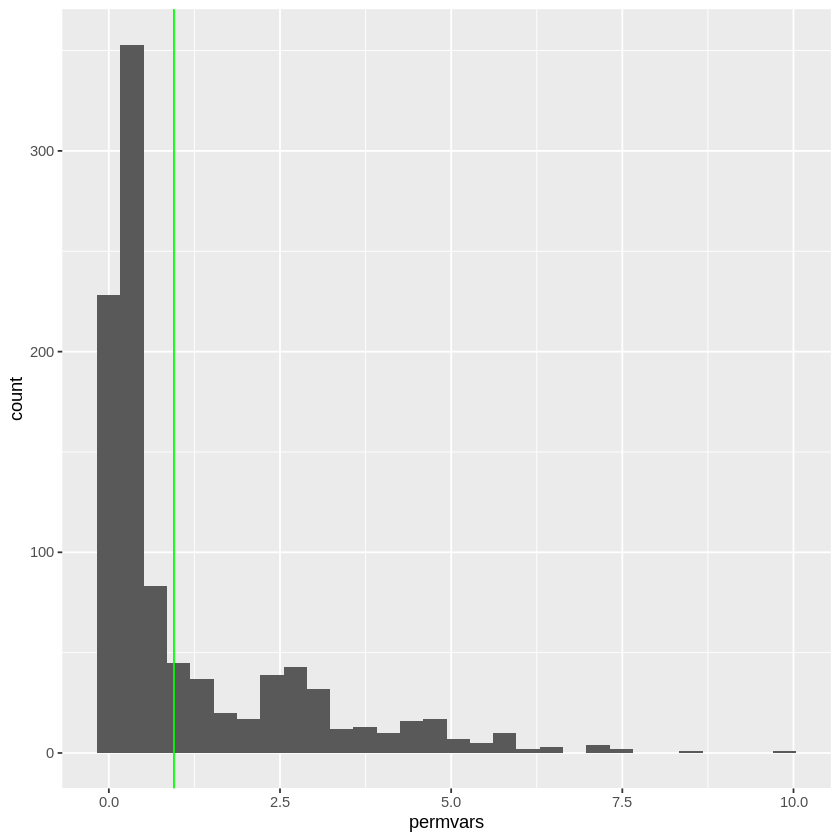

In [38]:
permvars %>% data.frame() %>%
  ggplot(aes(x = permvars)) +
  geom_histogram(bins=30) +
  geom_vline(xintercept = ac_varratio$AC_ratio, color = 'green')

In [39]:
(sum(ac_varratio$AC_ratio <= permvars)+1)/1000

[1] 0.315

Сколько раз перестановочные различия меньше или равны наблюдаемой разнице в средних значениях. В данном случае разница составляет 31%.

Доверительный интервал от 2,5% до 97,5%.

Значимые различия есть.

# Отношение дисперсий (GPHDL4)

In [40]:
ac_varratio <- data %>%
  group_by(Group) %>%
  summarize(var_AC = var(GPHDL4)) %>%
  summarize(AC_ratio = var_AC[1] / var_AC[2])

In [41]:
permvars <- c()

In [42]:
for (i in 1:reps){
  oneratio <- data %>%
    mutate(perm_c2 = sample(Group)) %>%
    group_by(perm_c2) %>%
    summarize(var_AC = var(GPHDL4)) %>%
    summarize(var_AC[1] / var_AC[2]) %>% pull()
  permvars <- c(permvars, oneratio)
}

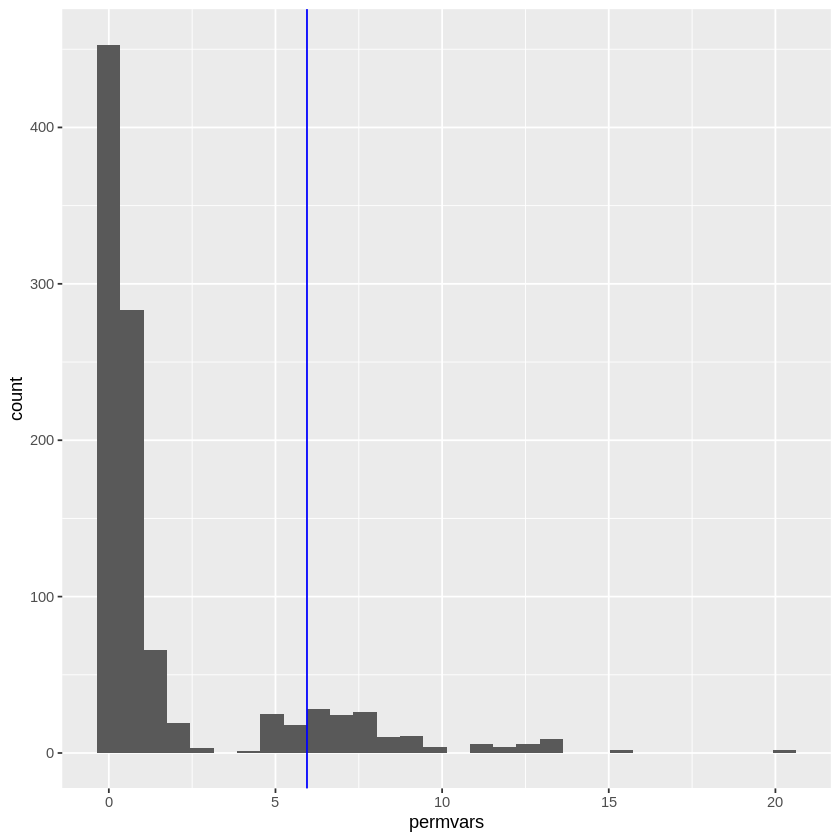

In [43]:
permvars %>% data.frame() %>%
  ggplot(aes(x = permvars)) +
  geom_histogram(bins=30) +
  geom_vline(xintercept = ac_varratio$AC_ratio, color = 'blue')

In [44]:
(sum(ac_varratio$AC_ratio <= permvars)+1)/1000

[1] 0.133

13% расчитанных отношений дисперсий будут больше, чем отношения дисперсий по выборкам без пермутации.